# Modelo SIRD (succeptible, infected, removed, died).



Esta tarea es un trabajo para la materia de Modelado computacional de Sistemas Biológicos del programa de Maestria en ciencias de la comutacion del CINVESTAV

Se pretende hacerle modificaciones al modelo SIR (Succeptible, infected, remoed) el cual es un sistema dinámico determinista formado por tres ecuaciones diferenciales, donde cada una de ellas representa a una clase epidemiológica en la que se puede dividir la población en estudio, susceptibles, infectados y recuperados. La población se considera constante y el tránsito ocurre de una clase a la otra hasta la clase de recuperados, donde se permanece con inmunidad permanente.

Sin embargo, en la vida real eso no ocurre ya que todos los infectados en una epidemia no siempre sobreviven y la inmunidad no es permanente, entonces, se hace una propuesta para modificar este modelo y agregar 2 parametos mas:

     
         (M) que son los muertos durante un tiempo determinado t 
         (C) que en este caso representarán a los reinfectados que se puedan presentar 
    

<strong>Primero, recordemos el modelo SIR:</strong>

Los miembros de una población se clasifican en tres grupos: susceptibles (S=susceptible), infectados (I=infected) y recuperados (R=recovered). Cada miembro de la población pertenece únicamente a uno de los tres grupos en un momento dado.



Por tanto, un miembro susceptible se puede contagiar (pasar de S a I) y uno contagiado se puede recuperar (pasar de I a R) o puede morir. En este modelo se supone que la recuperación proporciona inmunidad y no se regresa al grupo S. Las personas que fallecen por la enfermedad se incluyen también en el grupo R, con lo que la población total se mantiene constante. Como se habrá notado, el modelo introduce una simplificación, pues no tiene en cuenta ni los nacimientos ni las muertes por otros motivos. Existen modelos más complejos que también contemplan esos casos.

  ## Ecuaciones

Sea t la variable que indica el tiempo y S(t), I(t) y R(t) el número de personas que hay en cada grupo en un momento t determinado. Por las razones expuestas, su suma es una constante. 

Sea N el tamaño de la población, es decir, S(t) + I(t) + R(t) = N, para todo t. 


Para plantear las ecuaciones, es necesario formular la velocidad de cambio de esas tres funciones. La expresión matemática de la velocidad es una derivada.

He aquí las ecuaciones del modelo SIR:
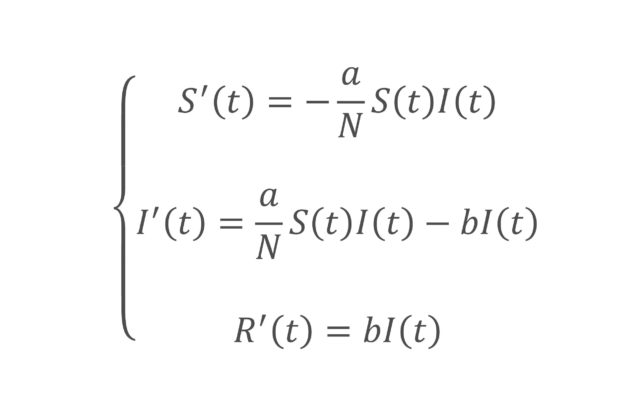

El contacto entre personas susceptibles e infectadas causará el contagio de algunos miembros de S. Dado que el riesgo de contagio depende de los contactos entre miembros de los grupos S e I, la hipótesis del modelo SIR es que sus encuentros son proporcionales al producto de S por I. Además existe un factor llamado tasa de transmisión que debe multiplicarse por dicho producto para calcular la velocidad de cambio del grupo susceptible. Expresamos esa tasa como a/N. El término figura en la ecuación porque expresa la velocidad con que se pasa de S a I. Dado que en el proceso el n.º de susceptibles disminuye y el de personas infectadas aumenta, es negativo para S’ y positivo, en cambio, para I’.

## Propuesta para agregar muertes


Como se puede ver, que quienes se curen o fallezcan pasarán de I a R. 
Para calcular cuántas personas lo hacen se tiene una tasa de recuperación, que ha de multiplicarse por el número de personas infectadas. Por eso aparece el término en las ecuaciones; es negativo para I’, porque reduce el número de personas infectadas y positivo para R’, porque  aumenta el número de recuperadas, sin embargo, estos recuperados se divien en "Recuperados"y "Muertos"

## Modelo SIRD (Succeptible, Infected,Removed,Death)

### $\dot S = -\beta SI $
### $\dot I = \beta SI - \gamma I -\delta I $
### $\dot R = \gamma SI $
### $\dot D = \delta I $
#### $\;$


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

from ipywidgets import *
%matplotlib notebook

In [3]:

## Generalización del Metodo de Euler para n dimensiones e incorporacion de parametros

def EulerND(f,x0,t0,tf,dt,params):
        
    T=[]
    X=[]

    for i in range(len(x0)):
        a = []
        X.append(a)
        X[i].append(x0[i])

    T.append(t0)

    t=t0
    x=x0

    while (t<tf):
        x = x + f(x,params)*dt
        t = t + dt
        for i in range(len(x0)):
            X[i].append(x[i])
        T.append(t)

    return X,T

In [4]:
def SIRD (x,params):
    beta= params[0]
    gama= params [1]
    delta= params[2]
    
    y= np.array(np.zeros(4))
    
    y[0]=-beta*x[0]*x[1]
    y[1]= beta*x[0]*x[1] - gama*x[1] - delta*x[1]
    y[2]= gama*x[1]
    y[3]= delta*x[1]
    
    return y
    

<IPython.core.display.Javascript object>


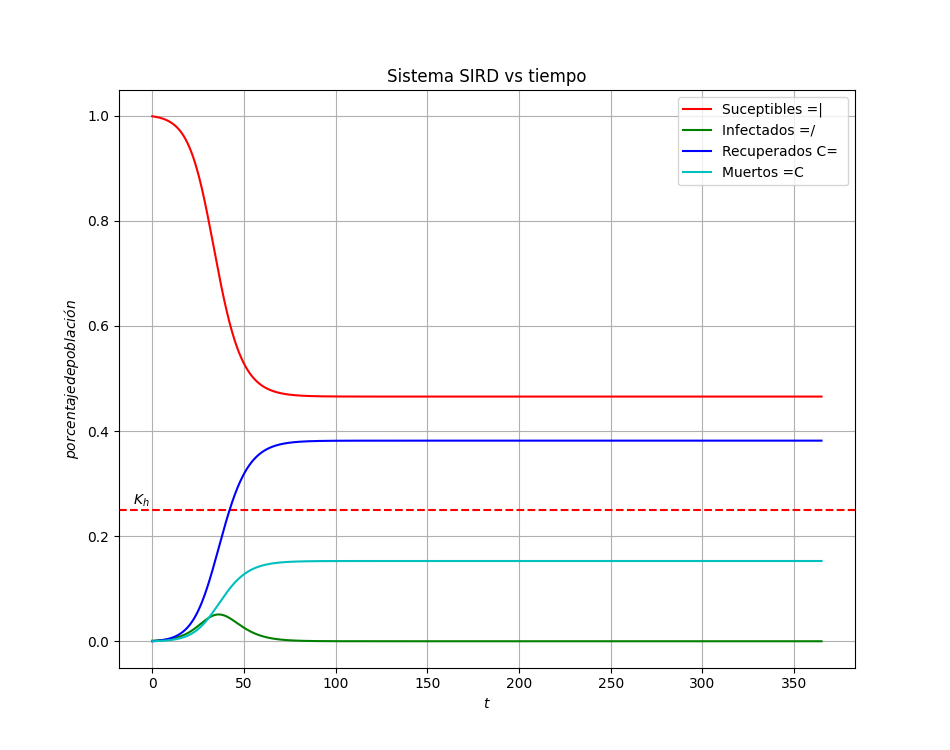

interactive(children=(FloatSlider(value=0.5, description='beta', max=5.0, min=0.1, step=0.01), FloatSlider(val…

In [5]:
fig,ax = plt.subplots(figsize=(9.5,7.5))
ax.grid(True)

N=1000
Kh=0.25

@widgets.interact(beta=(0.1,5,0.01), gama =(0.1,5,0.01), delta=(0.1,5,0.1))

def update(beta=0.5,gama=0.25, delta=0.1):
    
    for artist in plt.gca().lines + plt.gca().collections: #para limpiar la gráfica
        artist.remove()
    ax.clear()
    ax.grid(True)
    
    #Formato de la gráfica
    
    #Títulos
    
    plt.title("Sistema SIRD vs tiempo")
    plt.xlabel("$t$")
    plt.ylabel("$porcentaje de población$")
    
    #vac=0
    #gama= float(1)/float(diasInf)
    
    #Condiciones iniciales
    i=1
    s=(N-i)
    r=0
    d=0
    
    I0=float(i)/float(N)
    S0=float(s)/float(N)
    R0=float(r)/float(N)
    D0=float(d)/float(N)
    
    
    plt.axhline(Kh,color='red', ls='--')
    ax.text(-10.5, Kh+0.01, '$K_h$')
    
    params=np.array([beta,gama,delta])
       
    x0=np.array([S0,I0,R0,D0])
    
    Y,T=EulerND (SIRD,x0,0,365,0.001,params)
    
    S= Y[0]
    I= Y[1]
    R= Y[2]
    D= Y[3]

    plt.plot(T,S,'r',label='Suceptibles =|')
    plt.plot(T,I,'g',label='Infectados =/')
    plt.plot(T,R,'b',label='Recuperados C= ')
    plt.plot(T,D,'c',label='Muertos =C ')
    plt.legend()
    
    
   # r0=S0*beta*(float(1)/float(gama))
   # sus=(float(gama)/float(beta))
    


### $\dot S = -\beta SI $
### $\dot I = \beta SI - \gamma I -\delta I $
### $\dot R = \gamma SI $
### $\dot D = \delta I $
#### $\;$

## Propuesta para agregar reinfectados

Existen muchios modelos ,variantes de el modelo SIR que toman en cuenta situaciones más reales:

  <li>El que tiene en cuenta la dinámica vital: los nacimientos se incluyen en el grupo S; en todos los grupos se dan fallecimientos por causas distintas a la infección.</li>
  <li>Modelo SIS: no hay inmunidad. Las personas infectadas que se recuperan pasan de nuevo al grupo S.</li>
  <li>Modelo SIRS: la inmunidad es temporal. Del grupo R se pasa de nuevo al S, pero no inmediatamente.</li>
  
  
  
<li>Y bueno, para este trabajo tomaremos el modelo SIRD que se propuso antes y se agregarán los sobrevivientes de nuevo al grupo suceptible, de tal suerte que pueden ser reinfectados, y lo llamaremos SIRDS</li>




## Modelo SIRDS

## $\dot S = -\beta SI $
## $\dot I = \beta SI - \gamma I -\delta I + \epsilon R_O $
## $\dot R = \gamma SI $
## $\dot D = \delta I $
## $\dot R_0 = \frac{S_0(\gamma- \delta)}{\beta} $
## $\dot RI = R_O $
### $\;$

In [14]:
def SIRDRe (x,params):
    beta= params[0]
    gama= params [1]
    delta= params[2]
    epsilon= params[3]
    
    y= np.array(np.zeros(5))
    
    y[0]=-beta*x[0]*x[1]
    y[1]= beta*x[0]*x[1] - gama*x[1] - delta*x[1]
    y[2]= gama*x[1]
    y[3]= delta*x[1]
    y[4]= (x[0]*(gama-delta))/beta
    
    return y
    

<IPython.core.display.Javascript object>


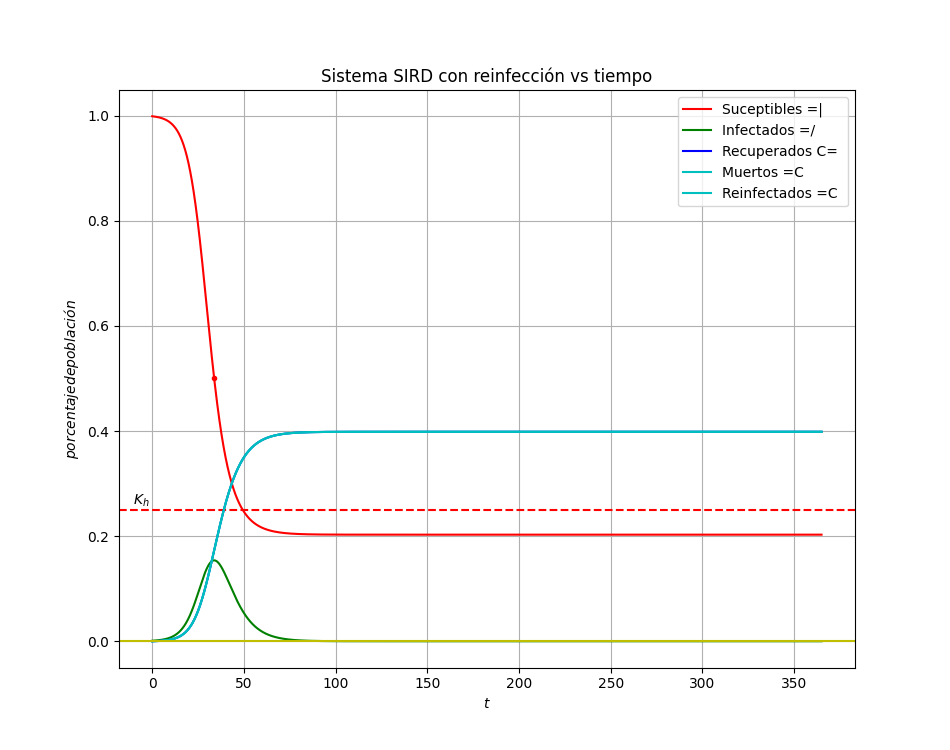

interactive(children=(FloatSlider(value=0.4, description='beta', max=5.0, min=0.1, step=0.01), FloatSlider(val…

In [15]:
fig,ax = plt.subplots(figsize=(9.5,7.5))
ax.grid(True)

N=1000   #poblacion
Kh=0.25

@widgets.interact(beta=(0.1,5,0.01), gama =(0.1,5,0.01), delta=(0.1,5,0.1),epsilon=(0.1,5,0.1))

def update(beta=0.4,gama=0.035, delta=0.001,epsilon=0.01):
    
    for artist in plt.gca().lines + plt.gca().collections: #para limpiar la gráfica
        artist.remove()
    ax.clear()
    ax.grid(True)
    
    #Formato de la gráfica
    
    #Títulos
    
    plt.title("Sistema SIRD con reinfección vs tiempo")
    plt.xlabel("$t$")
    plt.ylabel("$porcentaje de población$")
    
    #vac=0
    #gama= float(1)/float(diasInf)
    
    #Condiciones iniciales
    i=1
    s=(N-i)
    r=0
    d=0
    r_0 =0
    
    I0=float(i)/float(N)
    S0=float(s)/float(N)
    R0=float(r)/float(N)
    D0=float(d)/float(N)
    R_0=float(r_0)/float(N)
    
    
    plt.axhline(Kh,color='red', ls='--')
    ax.text(-10.5, Kh+0.01, '$K_h$')
    
    params=np.array([beta,gama,delta,epsilon])
       
    x0=np.array([S0,I0,R0,D0,R_0])
    
    Y,T=EulerND (SIRDRe,x0,0,365,0.001,params)
    
    S= Y[0]
    I= Y[1]
    R= Y[2]
    D= Y[3]
    R0= Y[4]
    

    plt.plot(T,S,'r',label='Suceptibles =|')
    plt.plot(T,I,'g',label='Infectados =/')
    plt.plot(T,R,'b',label='Recuperados C= ')
    plt.plot(T,D,'c',label='Muertos =C ')
    plt.plot(T,D,'c',label='Reinfectados =C ')
    
     
    r0=(S0*(gama-delta))/beta
    sus= (float(gama+delta)/float(beta))
    plt.axhline(r0,color='y')
    
    plt.legend()
    
    xp=0

    for x in range(len(S)):
        if (round(S[x],4)== round(sus,4)):
            xp=x
        
    plt.plot(T[xp],sus,'r.')
    